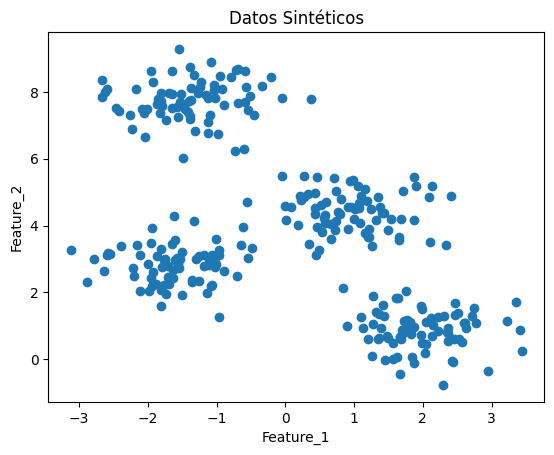

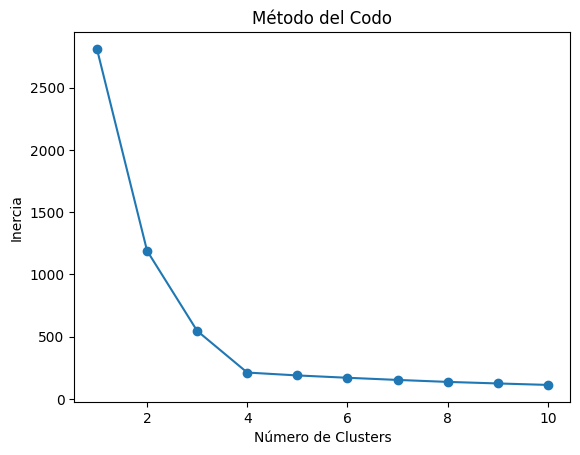

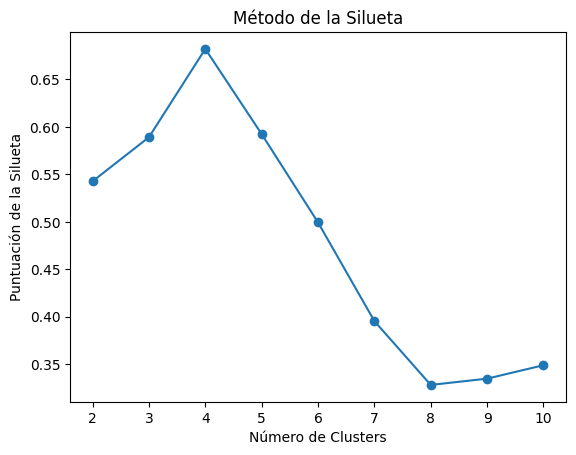

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Crear un conjunto de datos sintético con 4 centros
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# Convertir el conjunto de datos en un DataFrame de Pandas
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

plt.scatter(df['Feature_1'], df['Feature_2'])
plt.title("Datos Sintéticos")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

# Método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Método de la Silueta
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.title('Método de la Silueta')
plt.show()


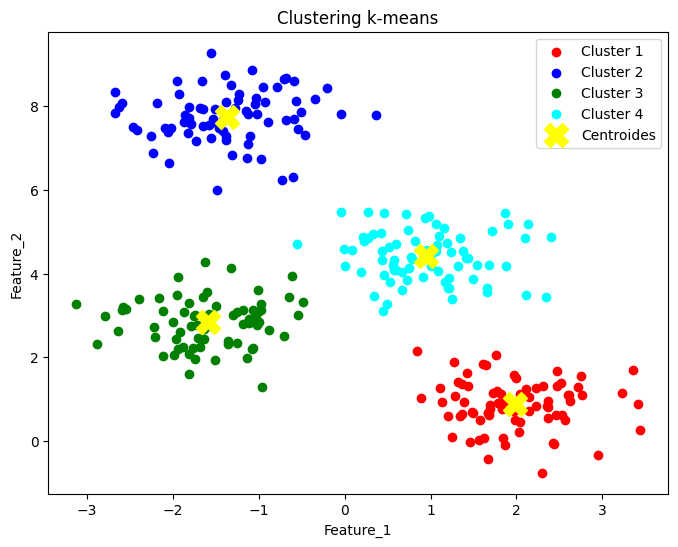

In [2]:
# Crear el modelo k-means con 4 clusters
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(df)

# Obtener los centroides y las etiquetas de los clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Crear una figura
plt.figure(figsize=(8, 6))

# Colores para los clusters
colors = ['red', 'blue', 'green', 'cyan']

# Graficar los puntos coloreados por sus etiquetas
for i in range(4):
    plt.scatter(df['Feature_1'][labels == i], df['Feature_2'][labels == i], 
                c=colors[i], label=f'Cluster {i+1}')

# Graficar los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroides', marker='X')

plt.title("Clustering k-means")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.legend()
plt.show()

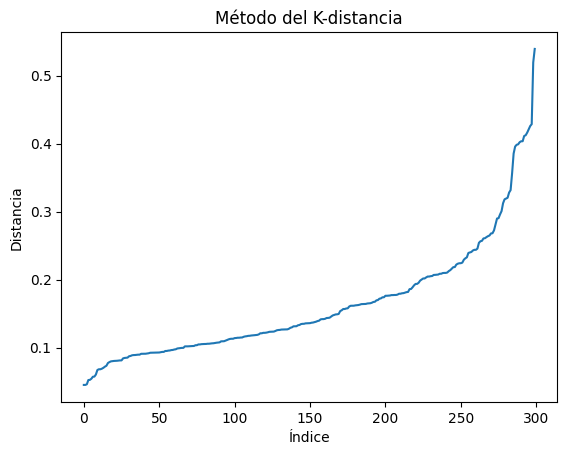

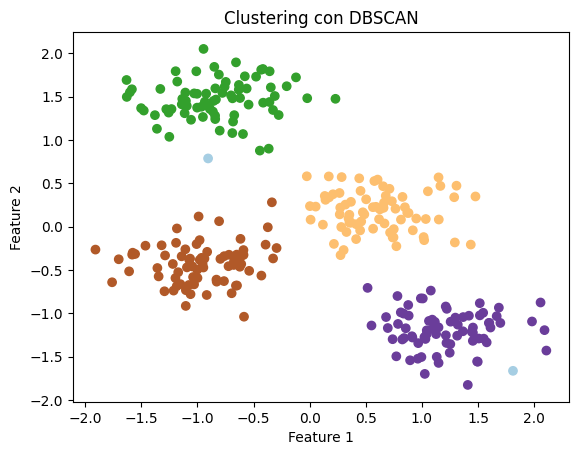

In [4]:
# Calcular distancias k-vecinas más cercanas
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Distancia de la k-ésima vecindad más cercana
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.title('Método del K-distancia')
plt.xlabel('Índice')
plt.ylabel('Distancia')
plt.show()


# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Paired', marker='o')
plt.title('Clustering con DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()